In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
x = np.linspace(0.1, 10, 100)
f1 = np.sin(x)
f2 = np.cos(x)

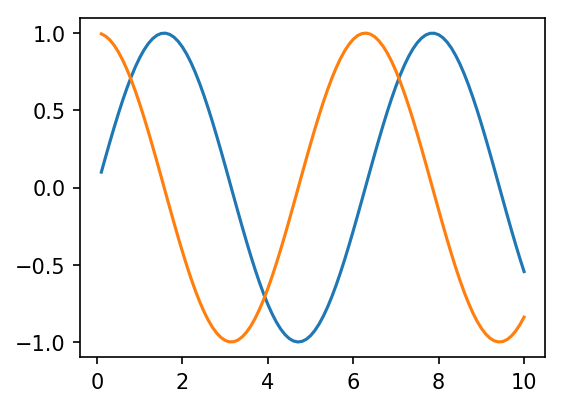

In [205]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(x, f1)
plt.plot(x, f2)
plt.show()

In [206]:
F = np.zeros((100, 2))
F[:, 0] = f1
F[:, 1] = f2

In [153]:
loading = np.random.normal(0, 1, [2, 6])
Y_true = np.matmul(F, loading)
Y = Y_true + np.random.normal(0, 0.2, [100, 6])

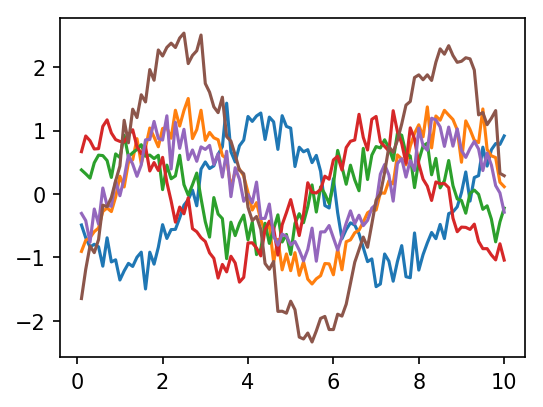

In [207]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(6):
    plt.plot(x, Y[:, j])
plt.show()

In [155]:
from sklearn.decomposition import PCA

In [156]:
latent_dim = 2
pca = PCA(n_components=latent_dim)
components = pca.fit_transform(Y)

In [157]:
Y_hat = pca.inverse_transform(components)
mse = np.mean((Y - Y_hat) ** 2)
print(mse)

0.024967571885651255


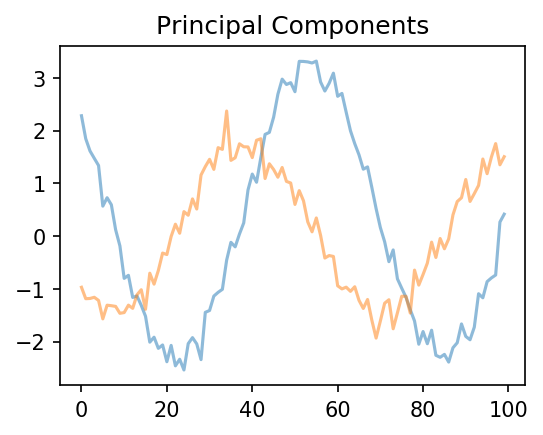

In [208]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(components[:, j], alpha=0.5)
plt.title('Principal Components')
plt.show()

In [216]:
loading_matrix = np.random.normal(0, 1, [2, 6])
Y_variance = np.random.normal(0, 0.2, 6) ** 2
X = np.linspace(0.1, 10, 100).reshape((100, 1))  # create initial GP covariance matrices
cov1 = sample_covariance(X, 1.0, 1.0)  # length scale 1.0 corresponds to 10 time points
cov2 = sample_covariance(X, 1.0, 1.0)  # variance scale set to 1.0 as well
S1, S2, S3, S4 = build_covariance_blocks([cov1, cov2], loading_matrix, Y_variance)
F = sample_conditional_F(Y, S1, S2, S3, S4)

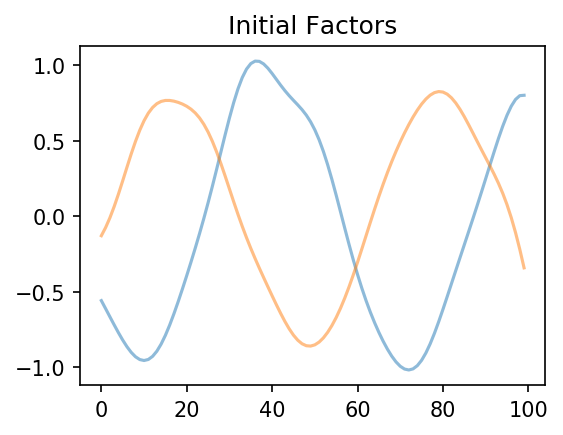

In [217]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for j in range(2):
    plt.plot(F[:, j], alpha=0.5)
plt.title('Initial Factors')
plt.show()

In [191]:
from model import *

In [192]:
def run_model_sampler(Y, initial_F, n_iter):
    """
    Create model and run Gibbs sampler for n iterations.
    """
    F_sample = []
    loading_sample = []
    variance_sample = []
    trace_sample = []
    mse_history = []
    F = initial_F
    for i in tqdm(range(n_iter)):
        F, loading_matrix, Y_variance, gp_traces, mse = gibbs_sampling(F, Y)
        F_sample.append(F)
        loading_sample.append(loading_matrix)
        variance_sample.append(Y_variance)
        trace_sample.append(gp_traces)
        mse_history.append(mse)
    return F_sample, loading_sample, variance_sample, trace_sample, mse_history

In [193]:
results = run_model_sampler(Y, F, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

0.3367401353464412


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 388.71it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  2%|▏         | 1/50 [00:17<14:08, 17.31s/it]

0.0718716359866096


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 417.84it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  4%|▍         | 2/50 [00:35<14:01, 17.52s/it]

0.05656569495018708


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 447.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  6%|▌         | 3/50 [01:00<15:25, 19.69s/it]

0.05027930934170386


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 516.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

  8%|▊         | 4/50 [01:15<14:12, 18.53s/it]

0.0447065225047519


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 543.17it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 10%|█         | 5/50 [01:32<13:33, 18.08s/it]

0.04478781809725695


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 462.72it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 12%|█▏        | 6/50 [01:51<13:22, 18.23s/it]

0.04565690521986029


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 504.45it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 14%|█▍        | 7/50 [02:11<13:23, 18.68s/it]

0.040570913866559595


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 432.88it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 16%|█▌        | 8/50 [02:29<12:56, 18.49s/it]

0.041587505755892255


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 340.67it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 18%|█▊        | 9/50 [02:47<12:32, 18.35s/it]

0.041434319361612765


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 372.48it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 20%|██        | 10/50 [03:04<11:56, 17.90s/it]

0.041132428255606326


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 378.75it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 22%|██▏       | 11/50 [03:21<11:27, 17.62s/it]

0.04156067005032021


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 378.79it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 24%|██▍       | 12/50 [03:37<11:00, 17.38s/it]

0.040606849375978596


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 372.58it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 26%|██▌       | 13/50 [03:55<10:40, 17.32s/it]

0.043703968871181796


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 397.91it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 28%|██▊       | 14/50 [04:12<10:18, 17.19s/it]

0.040582564412796424


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 393.63it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 30%|███       | 15/50 [04:28<09:57, 17.08s/it]

0.042373331745743786


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 377.19it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 32%|███▏      | 16/50 [04:45<09:39, 17.05s/it]

0.04030834216845319


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 378.25it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 34%|███▍      | 17/50 [05:02<09:22, 17.05s/it]

0.04264559338223904


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 383.76it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 36%|███▌      | 18/50 [05:20<09:06, 17.09s/it]

0.04184889429867444


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 368.79it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 38%|███▊      | 19/50 [05:37<08:49, 17.07s/it]

0.04121649054168384


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 393.46it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 40%|████      | 20/50 [05:54<08:34, 17.14s/it]

0.04150142516604492


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 352.15it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 42%|████▏     | 21/50 [06:11<08:13, 17.03s/it]

0.0394482391192936


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 383.05it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 44%|████▍     | 22/50 [06:28<07:58, 17.09s/it]

0.041008539813094075


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 374.09it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 46%|████▌     | 23/50 [06:45<07:42, 17.14s/it]

0.03972348258115325


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 377.49it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 48%|████▊     | 24/50 [07:02<07:23, 17.07s/it]

0.039160625412490796


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 387.21it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 50%|█████     | 25/50 [07:19<07:07, 17.11s/it]

0.040800329156191764


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 375.39it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 52%|█████▏    | 26/50 [07:36<06:49, 17.04s/it]

0.040452900706047214


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 382.54it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 54%|█████▍    | 27/50 [07:55<06:43, 17.53s/it]

0.0415590883620414


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 532.96it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 56%|█████▌    | 28/50 [08:12<06:20, 17.29s/it]

0.03953817637905885


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 549.56it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 58%|█████▊    | 29/50 [08:28<05:58, 17.07s/it]

0.04046941034757645


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 504.36it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 60%|██████    | 30/50 [08:50<06:13, 18.66s/it]

0.04057872134171649


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 364.62it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 62%|██████▏   | 31/50 [09:10<06:01, 19.01s/it]

0.03941059479217105


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 419.54it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 64%|██████▍   | 32/50 [09:29<05:39, 18.87s/it]

0.04097331826794598


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 543.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 66%|██████▌   | 33/50 [09:47<05:16, 18.62s/it]

0.04084975366064084


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:02<00:00, 214.93it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 68%|██████▊   | 34/50 [10:06<04:58, 18.66s/it]

0.03999743845082623


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:02<00:00, 280.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 70%|███████   | 35/50 [10:27<04:53, 19.57s/it]

0.038837395884082554


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 350.01it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 72%|███████▏  | 36/50 [10:45<04:26, 19.01s/it]

0.04098767913185377


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 362.86it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 74%|███████▍  | 37/50 [11:03<04:01, 18.60s/it]

0.04088564372147922


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 376.26it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 76%|███████▌  | 38/50 [11:20<03:39, 18.31s/it]

0.03887415581803964


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 315.74it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 78%|███████▊  | 39/50 [11:42<03:33, 19.44s/it]

0.03871086100282229


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:02<00:00, 255.61it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 80%|████████  | 40/50 [12:03<03:18, 19.85s/it]

0.03955601161208511


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 361.56it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 82%|████████▏ | 41/50 [12:21<02:52, 19.14s/it]

0.03966270578791732


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 363.37it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 84%|████████▍ | 42/50 [12:38<02:29, 18.67s/it]

0.03956231115975952


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 375.32it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 86%|████████▌ | 43/50 [12:56<02:07, 18.27s/it]

0.039281723625348854


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 360.22it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 88%|████████▊ | 44/50 [13:13<01:47, 17.97s/it]

0.03971317188738639


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 369.21it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 90%|█████████ | 45/50 [13:30<01:28, 17.77s/it]

0.03964527442947811


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 309.12it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 92%|█████████▏| 46/50 [13:50<01:13, 18.27s/it]

0.03904219695866046


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 363.24it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 94%|█████████▍| 47/50 [14:07<00:53, 17.90s/it]

0.04139708411546741


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 332.01it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 96%|█████████▌| 48/50 [14:24<00:35, 17.86s/it]

0.04015065876714794


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 345.31it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

 98%|█████████▊| 49/50 [14:42<00:17, 17.82s/it]

0.03955720566657585


Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 600/600 [00:01<00:00, 322.94it/s]Only one chain was sampled, this makes it impossible to run some convergence checks
Only 100 samples in chain.
Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [s]
>Metropolis: [l]

100%|██████████| 50/50 [15:00<00:00, 17.96s/it]


In [194]:
F_sample, loading_sample, variance_sample, trace_sample, mse_history = results

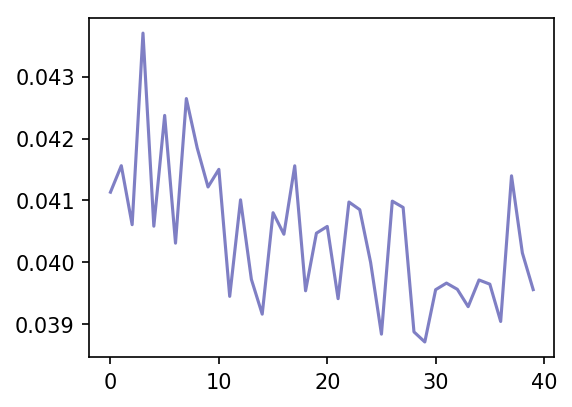

In [218]:
fig = plt.figure(figsize=(4, 3), dpi=150)
plt.plot(mse_history[10:], alpha=0.5, color='darkblue')
plt.show()

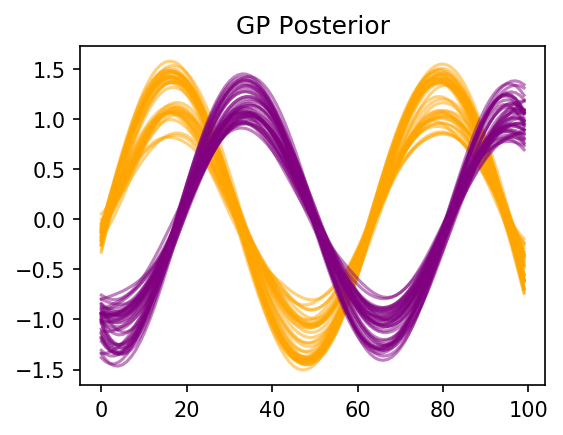

In [219]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(F_sample[i][:, 0], alpha=0.5, color='orange')
for i in range(10, 50):
    plt.plot(F_sample[i][:, 1], alpha=0.5, color='purple')
#for j in range(2):
#    plt.plot(components[:, j], alpha=0.5, lw=4)
plt.title('GP Posterior')
plt.show()

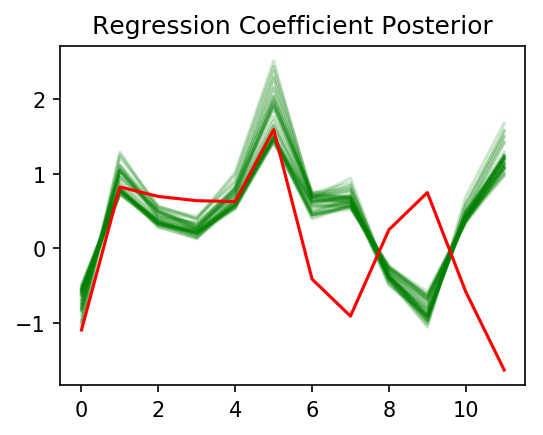

In [220]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(loading_sample[i].flatten(), alpha=0.2, color='green')
plt.plot(loading.flatten(), color='red')
plt.title('Regression Coefficient Posterior')
plt.show()

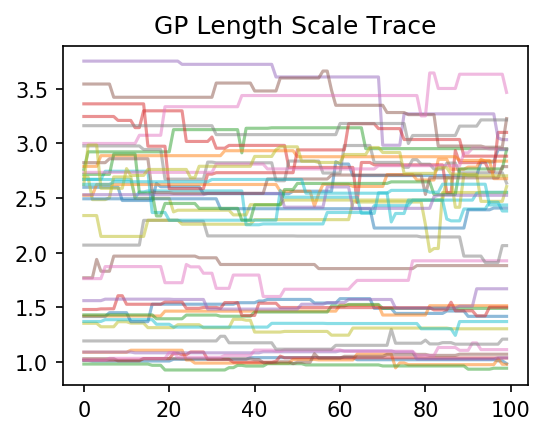

In [221]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(trace_sample[i][0]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()

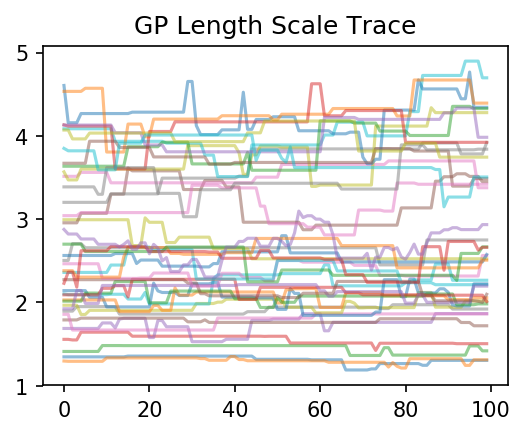

In [222]:
fig = plt.figure(figsize=(4, 3), dpi=150)
for i in range(10, 50):
    plt.plot(trace_sample[i][1]['l'], alpha=0.5)
plt.title('GP Length Scale Trace')
plt.show()